# **IMPORT**

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Imbalanced Learning Libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# XGBoost
import xgboost as xgb

In [110]:
data = pd.read_csv('diabetes_dataset.csv')
df = pd.DataFrame(data)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238290 entries, 1.0 to 1.0
Data columns (total 17 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   DiabetesOutput           1238290 non-null  int64  
 1   HighBloodPressure        1238290 non-null  float64
 2   HighCholesterol          1238290 non-null  int64  
 3   CholesterolCheck         1238290 non-null  float64
 4   BMI                      1238290 non-null  float64
 5   Smoker                   1238290 non-null  float64
 6   Stroke                   1238290 non-null  float64
 7   HeartDiseaseorAttack     1238290 non-null  int64  
 8   PhysicalActivity         1238290 non-null  int64  
 9   HeavyAlcoholConsumption  1238290 non-null  float64
 10  AnyHealthcare            1238290 non-null  float64
 11  GeneralHealth            1238290 non-null  float64
 12  MentalHealth             1238290 non-null  float64
 13  PhysicalHealth           1238290 non-null  float6

# **Scanning The Data**

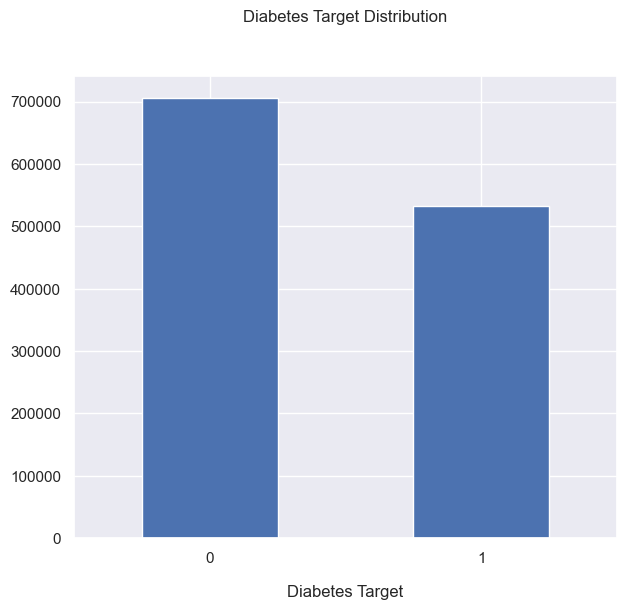

DiabetesOutput
0    705161
1    533129
Name: count, dtype: int64


In [111]:
sns.set_theme(font_scale=1.0)
df['DiabetesOutput'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Diabetes Target", labelpad=14)
plt.title("Diabetes Target Distribution", y=1.1);
plt.show()

print(df['DiabetesOutput'].value_counts())

## Checking Missing Value and Removing Duplicate Rows

In [112]:
df.isnull().sum()

DiabetesOutput             0
HighBloodPressure          0
HighCholesterol            0
CholesterolCheck           0
BMI                        0
Smoker                     0
Stroke                     0
HeartDiseaseorAttack       0
PhysicalActivity           0
HeavyAlcoholConsumption    0
AnyHealthcare              0
GeneralHealth              0
MentalHealth               0
PhysicalHealth             0
DifficultyWalking          0
Sex                        0
Age                        0
dtype: int64

In [113]:
duplicate_rows = df.duplicated()
print("All Duplicate Rows:")
df[df.duplicated(keep=False)]

All Duplicate Rows:


,DiabetesOutput,HighBloodPressure,HighCholesterol,CholesterolCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysicalActivity,HeavyAlcoholConsumption,AnyHealthcare,GeneralHealth,MentalHealth,PhysicalHealth,DifficultyWalking,Sex,Age
1.0,1,1.0,1,27.0,0.0,0.0,0.0,1,0,1.0,0.0,2.0,0.0,0.0,1.0,0,11
0.0,1,0.0,1,29.0,0.0,0.0,0.0,1,0,1.0,0.0,2.0,0.0,0.0,0.0,1,10
0.0,0,1.0,1,25.0,0.0,0.0,0.0,2,0,1.0,0.0,3.0,0.0,0.0,0.0,1,11
0.0,0,0.0,1,28.0,0.0,0.0,0.0,2,0,1.0,0.0,3.0,0.0,0.0,0.0,1,10
0.0,1,1.0,1,24.0,0.0,0.0,0.0,2,0,1.0,0.0,3.0,0.0,0.0,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0,1,1.0,1,31.0,0.0,0.0,0.0,1,0,1.0,0.0,3.0,0.0,0.0,0.0,1,11
0.0,0,0.0,1,27.0,0.0,0.0,0.0,1,0,1.0,0.0,3.0,2.0,0.0,0.0,0,8
1.0,1,1.0,1,26.0,0.0,0.0,0.0,1,0,1.0,0.0,3.0,0.0,0.0,0.0,0,11
0.0,0,0.0,1,25.0,0.0,0.0,0.0,2,0,1.0,0.0,2.0,0.0,0.0,0.0,0,3


In [114]:
dataClean = df.drop_duplicates()
print("All Duplicate Rows:")
dataClean[dataClean.duplicated(keep=False)]

All Duplicate Rows:


,DiabetesOutput,HighBloodPressure,HighCholesterol,CholesterolCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysicalActivity,HeavyAlcoholConsumption,AnyHealthcare,GeneralHealth,MentalHealth,PhysicalHealth,DifficultyWalking,Sex,Age


In [115]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529649 entries, 1.0 to 0.0
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DiabetesOutput           529649 non-null  int64  
 1   HighBloodPressure        529649 non-null  float64
 2   HighCholesterol          529649 non-null  int64  
 3   CholesterolCheck         529649 non-null  float64
 4   BMI                      529649 non-null  float64
 5   Smoker                   529649 non-null  float64
 6   Stroke                   529649 non-null  float64
 7   HeartDiseaseorAttack     529649 non-null  int64  
 8   PhysicalActivity         529649 non-null  int64  
 9   HeavyAlcoholConsumption  529649 non-null  float64
 10  AnyHealthcare            529649 non-null  float64
 11  GeneralHealth            529649 non-null  float64
 12  MentalHealth             529649 non-null  float64
 13  PhysicalHealth           529649 non-null  float64
 14  Difficulty

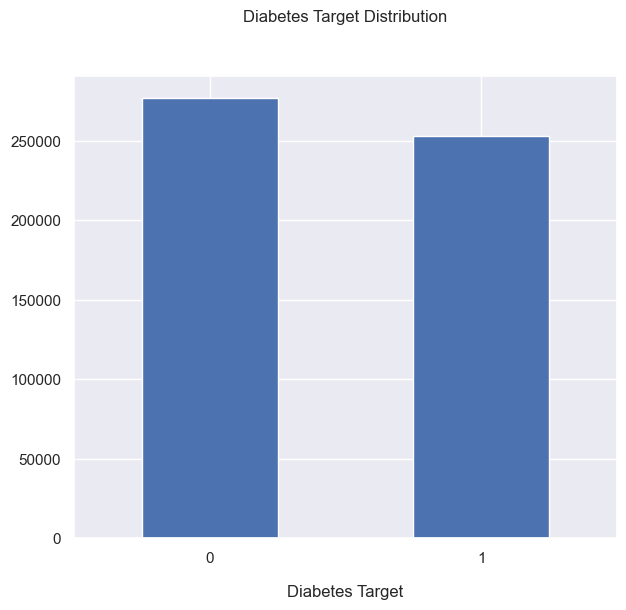

DiabetesOutput
0    276795
1    252854
Name: count, dtype: int64


In [116]:
sns.set_theme(font_scale=1.0)
dataClean['DiabetesOutput'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Diabetes Target", labelpad=14)
plt.title("Diabetes Target Distribution", y=1.1);
plt.show()

print(dataClean['DiabetesOutput'].value_counts())

# **Data Balancing**

In [117]:
X = dataClean.drop(['DiabetesOutput'], axis = 1).values
y = dataClean['DiabetesOutput']

## Over-Sampling SMOTE

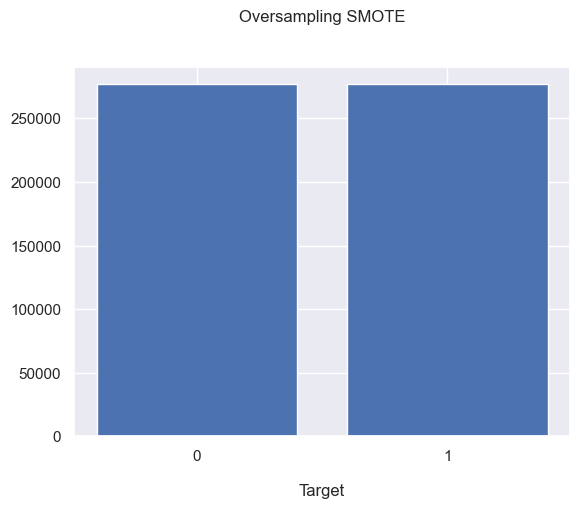

DiabetesOutput
1    276795
0    276795
Name: count, dtype: int64

In [118]:
# SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X, y)

# Oversampling SMOTE
sns.set_theme(font_scale=1.0)
smote_counts = y_resampled_smote.value_counts()

plt.bar(smote_counts.index, smote_counts.values)
plt.xlabel("Target", labelpad=14)
plt.xticks([0, 1])
plt.title("Oversampling SMOTE", y=1.1);
plt.show()

smote_counts

## Under-Sampling RandomUnderSampler

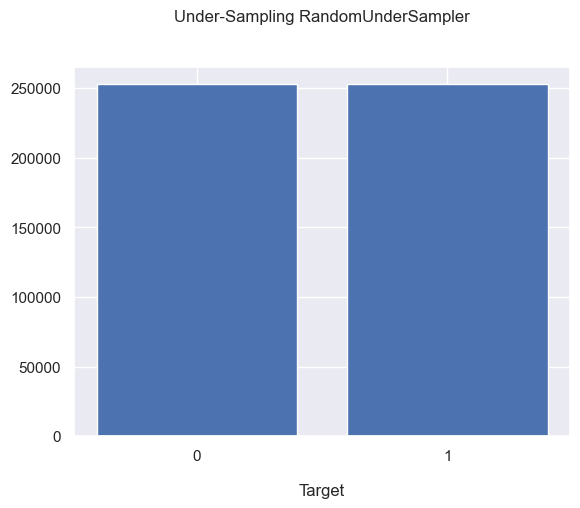

DiabetesOutput
0    252854
1    252854
Name: count, dtype: int64

In [119]:
# RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)

# Under-Sampling RandomUnderSampler
sns.set_theme(font_scale=1.0)
rus_counts = y_resampled_rus.value_counts()

plt.bar(rus_counts.index, rus_counts.values)
plt.xlabel("Target", labelpad=14)
plt.xticks([0, 1])
plt.title("Under-Sampling RandomUnderSampler", y=1.1);
plt.show()

rus_counts

## Over- and Under-Sampling SMOTEENN

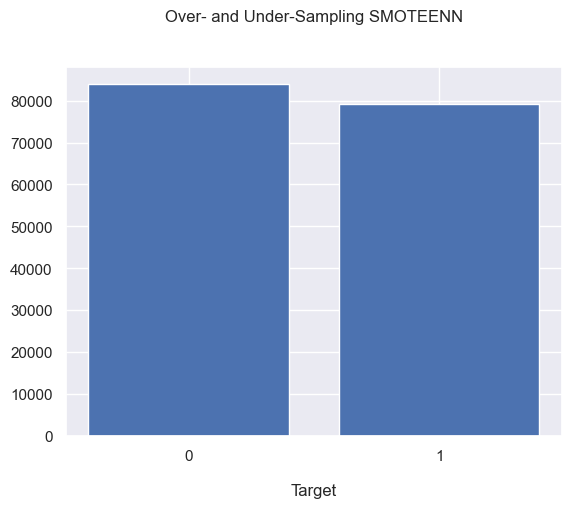

DiabetesOutput
0    83877
1    79115
Name: count, dtype: int64

In [120]:
# SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled_smoteenn, y_resampled_smoteenn = smoteenn.fit_resample(X, y)

# Over- and Under-Sampling SMOTEENN
sns.set_theme(font_scale=1.0)
smoteenn_counts = y_resampled_smoteenn.value_counts()

plt.bar(smoteenn_counts.index, smoteenn_counts.values)
plt.xlabel("Target", labelpad=14)
plt.xticks([0, 1])
plt.title("Over- and Under-Sampling SMOTEENN", y=1.1);
plt.show()

smoteenn_counts

## Comparing Sampling Model

In [121]:
#Data Raw
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Oversampling SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)
len(X_train_smote), len(X_test_smote), len(y_train_smote), len(y_test_smote)

model_smote = xgb.XGBClassifier()
model_smote.fit(X_train_smote, y_train_smote)

# Under-Sampling RandomUnderSampler
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_resampled_rus, y_resampled_rus, test_size=0.2, random_state=42)
len(X_train_rus), len(X_test_rus), len(y_train_rus), len(y_test_rus)

model_rus = xgb.XGBClassifier()
model_rus.fit(X_train_rus, y_train_rus)

# Over- and Under-Sampling SMOTEENN
X_train_smoteenn, X_test_smoteenn, y_train_smoteenn, y_test_smoteenn = train_test_split(X_resampled_smoteenn, y_resampled_smoteenn, test_size=0.2, random_state=42)
len(X_train_smoteenn), len(X_test_smoteenn), len(y_train_smoteenn), len(y_test_smoteenn)

model_smoteenn = xgb.XGBClassifier()
model_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

print("Success")

Success


In [122]:
# Raw Data
y_test_pred = model.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred))

accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nTest Set Accuracy:", accuracy_test)


Test Set:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71     55303
           1       0.68      0.69      0.68     50627

    accuracy                           0.70    105930
   macro avg       0.70      0.70      0.70    105930
weighted avg       0.70      0.70      0.70    105930


Test Set Accuracy: 0.6969224959879166


In [123]:
# Over-Sampling SMOTE
y_test_pred_smote = model_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_smote))

accuracy_test_smote = accuracy_score(y_test_smote, y_test_pred_smote)

print("\nTest Set Accuracy:", accuracy_test_smote)


Test Set:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71     55275
           1       0.71      0.72      0.71     55443

    accuracy                           0.71    110718
   macro avg       0.71      0.71      0.71    110718
weighted avg       0.71      0.71      0.71    110718


Test Set Accuracy: 0.711681930670713


In [124]:
# Under-Sampling RandomUnderSampler
y_test_pred_rus = model_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_rus))

accuracy_test_rus = accuracy_score(y_test_rus, y_test_pred_rus)

print("\nTest Set Accuracy:", accuracy_test_rus)


Test Set:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69     50642
           1       0.68      0.72      0.70     50500

    accuracy                           0.69    101142
   macro avg       0.69      0.69      0.69    101142
weighted avg       0.69      0.69      0.69    101142


Test Set Accuracy: 0.6938265013545313


In [125]:
# Over and Under-Sampling SMOTEENN
y_test_pred_smoteenn = model_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_smoteenn))

accuracy_test_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_smoteenn)

print("\nTest Set Accuracy:", accuracy_test_smoteenn)


Test Set:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     16616
           1       0.94      0.94      0.94     15983

    accuracy                           0.94     32599
   macro avg       0.94      0.94      0.94     32599
weighted avg       0.94      0.94      0.94     32599


Test Set Accuracy: 0.9401515383907482


C:\Users\Darren\AppData\Local\Temp\ipykernel_27172\2981312884.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_comp['Sampling Technique'], rotation=45, ha='right')


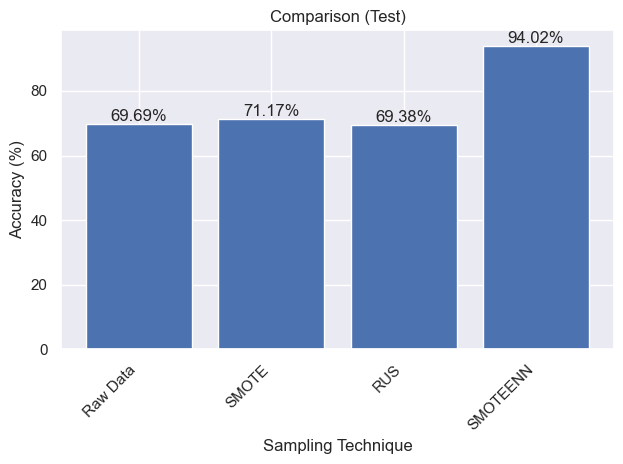

In [126]:
model_comp = pd.DataFrame({'Sampling Technique': ['Raw Data', 'SMOTE', 'RUS', 'SMOTEENN'], 'Accuracy': [accuracy_test*100, accuracy_test_smote*100, accuracy_test_rus*100, accuracy_test_smoteenn*100]})

fig, ax = plt.subplots()
bars = ax.bar(model_comp['Sampling Technique'], model_comp['Accuracy'])

ax.set_xlabel('Sampling Technique')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparison (Test)')
ax.set_xticklabels(model_comp['Sampling Technique'], rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **Training Predictive Model**

In [127]:
X_train = X_resampled_smoteenn
y_train = y_resampled_smoteenn

test_data = pd.read_csv('test_data.csv')

X_test = test_data.drop(['DiabetesOutput'], axis = 1).values
y_test = test_data['DiabetesOutput']

In [128]:
import pandas as pd

# Load the original data (csv1.csv)
csv1_data = pd.read_csv('correct_predictions.csv')

# Load the second dataset (csv2.csv)
csv2_data = pd.read_csv('diabetes_survey_dataset.csv')

# Separate the data based on DiabetesOutput (class 0 and class 1)
class_0_csv1 = csv1_data[csv1_data['DiabetesOutput'] == 0.0]
class_1_csv1 = csv1_data[csv1_data['DiabetesOutput'] == 1.0]

# Separate class_0 and class_1 from the second dataset (csv2.csv)
class_0_csv2 = csv2_data[csv2_data['DiabetesOutput'] == 0.0]
class_1_csv2 = csv2_data[csv2_data['DiabetesOutput'] == 1.0]

# Calculate how many more rows we need from csv1 and csv2 to make both classes have 25,000 rows
needed_class_0 = 25000 - len(class_0_csv1)  # How many more rows needed for class 0.0
needed_class_1 = 25000 - len(class_1_csv1)  # How many more rows needed for class 1.0

# Get the required rows from csv2 (real data) to make the total count for each class 25,000
# Ensure that we don't take more than what's available
class_0_csv2_needed = class_0_csv2.head(needed_class_0) if needed_class_0 > 0 else pd.DataFrame()
class_1_csv2_needed = class_1_csv2.head(needed_class_1) if needed_class_1 > 0 else pd.DataFrame()

# Combine the data from csv1 and the necessary data from csv2
balanced_class_0 = pd.concat([class_0_csv1, class_0_csv2_needed])
balanced_class_1 = pd.concat([class_1_csv1, class_1_csv2_needed])

# Combine the balanced class 0 and class 1
balanced_data = pd.concat([balanced_class_0, balanced_class_1])

# Check the new distribution of the balanced data
new_distribution = balanced_data['DiabetesOutput'].value_counts()

# Print the distribution
print(f"New distribution of DiabetesOutput:\n{new_distribution}")

# Save the balanced dataset to a CSV file
balanced_data.to_csv('balanced_data_25k.csv', index=False)

print("Balanced dataset has been saved to 'balanced_data_25k.csv'.")


New distribution of DiabetesOutput:
DiabetesOutput
0.0    25000
1.0    25000
Name: count, dtype: int64
Balanced dataset has been saved to 'balanced_data_25k.csv'.


## Decision Tree

Accuracy: 90.16%

Classification Report:

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     25000
         Yes       0.94      0.86      0.90     25000

    accuracy                           0.90     50000
   macro avg       0.90      0.90      0.90     50000
weighted avg       0.90      0.90      0.90     50000



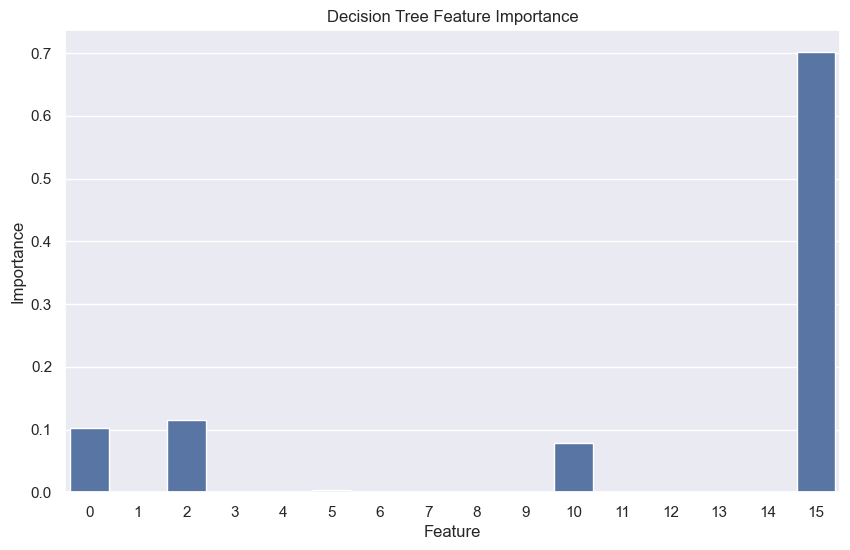

In [129]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("\nClassification Report:\n")
print(report)

importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': [f"{i}" for i in range(X.shape[1])],
    'Importance': importances
})

importances = feature_importance_df

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=importances)

plt.title("Decision Tree Feature Importance")
plt.show()

## Random Forest

In [130]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("\nClassification Report:\n")
print(report)

Accuracy: 87.17%

Classification Report:

              precision    recall  f1-score   support

          No       0.81      0.98      0.88     25000
         Yes       0.97      0.77      0.86     25000

    accuracy                           0.87     50000
   macro avg       0.89      0.87      0.87     50000
weighted avg       0.89      0.87      0.87     50000



## Logistic Regression

In [131]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("\nClassification Report:\n")
print(report)

Accuracy: 88.80%

Classification Report:

              precision    recall  f1-score   support

          No       0.83      0.97      0.90     25000
         Yes       0.97      0.80      0.88     25000

    accuracy                           0.89     50000
   macro avg       0.90      0.89      0.89     50000
weighted avg       0.90      0.89      0.89     50000



## Extra Trees Classifier

In [132]:
clf = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("\nClassification Report:\n")
print(report)


Accuracy: 89.63%

Classification Report:

              precision    recall  f1-score   support

          No       0.85      0.97      0.90     25000
         Yes       0.96      0.82      0.89     25000

    accuracy                           0.90     50000
   macro avg       0.90      0.90      0.90     50000
weighted avg       0.90      0.90      0.90     50000



## XGBoost

In [133]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 89.86%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90     25000
         1.0       0.89      0.91      0.90     25000

    accuracy                           0.90     50000
   macro avg       0.90      0.90      0.90     50000
weighted avg       0.90      0.90      0.90     50000

